<center>
<h1>Факультет "Прикладная математика" МАИ</h1>
<h2>Курс "Основы Python для анализа данных"</h2>
<h2>Артамонов Игорь Михайлович</h2>
</center>

<center><h2>Занятие № 13. Обработка изображений.</h2></center>

## Общение / вопросы по курсу

Платформа для групповой работы Atlassian Confluence факультета "Прикладная математика"

https://mai.moscow/display/PYTML

* <b>Занятие № 13. Обработка изображений</b>

## virtualenv + Jupyter notebook

```
<Ctrl> + <Alt> + T - новое окно терминала
```

```
$ conda -V

$ conda update conda

$ conda search "^python$"

$ conda create -n yourenvname python=x.x anaconda

$ source activate yourenvname

$ jupyter notebook

$ conda install -n yourenvname [package]
```

### <font color="green">ВОПРОС</a>
Какие задачи машинного обучения для __изображений__ могут быть:
* регрессией
* классификацией

##   Обработка изображений.</h2></center>

#### О чем говорим
* MLP - проблемы
* Операция свертки
* cv2, dlib, keras, 
* Область обработки (bounding box)
* Сверточные нейронные сети
* Детектирование лиц
* Распозавание лиц
* Сегментация

## Back propagation

https://towardsdatascience.com/understanding-backpropagation-algorithm-7bb3aa2f95fd

### Проблемы MLP


<img src="images12/1_fnU_3MGmFp0LBIzRPx42-w.png">

<img src="images13/tikz36.png">

* __много параметров__
$$
N = N_{вх} * N_{hidden 1} +  N_{hidden 1} * N_{hidden 2} + ...  N_{hidden N-1}* N_{hidden N} + N_{hidden N} * N_{вых}
$$<br>
Следствия:
    - медленно
    - легко переобучается
<br><br>
* __затухающие градиенты__
    - градиент прогонятеся обратно
    - много слоев - может остаться маленькая часть или даже обнулиться
 

### Способы решения
* нормализация (normalization / batch normalizaiton)
* "отсеивание" (dropout)
* "черезслойные" связи (residual networks)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
from numpy.random import randn
import seaborn as sns
from scipy import stats

import matplotlib as mpl
from matplotlib.patches import Ellipse
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
from sklearn.model_selection import KFold, train_test_split, GridSearchCV, cross_val_score

from sklearn.metrics import accuracy_score 

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [3]:
import os
import os.path

### Операция свертки

<img src="images13/YDusp.png">

### <font color="green">ВОПРОС</font>
* какой может быть цель данного ядра?
* чем его надо дополнить для этой операции по второму измерению?

Матрицы свертки:
* identity (копирование)
$$
  \begin{bmatrix}
    0 & 0 & 0 \\
    0 & 1 & 0 \\
    0 & 0 & 0
  \end{bmatrix}
$$
* детектирование границ
$$
  \begin{bmatrix}
    0 & 1 & 0 \\
    1 & -4 & 1 \\
    0 & 1 & 0
  \end{bmatrix}
$$
* повышение резкости
$$
\begin{bmatrix}
    0 & -1 & 0 \\
    -1 & 5 & -1 \\
    0 & -1 & 0
  \end{bmatrix}
$$
* размытие (нормализация)
$$ 1/9 * 
\begin{bmatrix}
    1 & 1 & 1 \\
    1 & 1 & 1 \\
    1 & 1 & 1
  \end{bmatrix}
$$
* размытие (фильтр Гаусса)
$$ 1/273 * 
\begin{bmatrix}
    1 & 4 & 7 & 4 & 1 \\
    4 & 16 & 26 & 16 & 4 \\
    7 & 26 & 41 & 26 & 7 \\
    4 & 16 & 26 & 16 & 4 \\
    1 & 4 & 7 & 4 & 1 
  \end{bmatrix}
$$

### <font color="red">ЗАДАНИЕ</a>
* примените все эти фильтры  с испольованием _scipy.signal.convolve2d_ к изображению _images13/bdavidson-09.jpg_


You should consider upgrading via the 'pip install --upgrade pip' command.


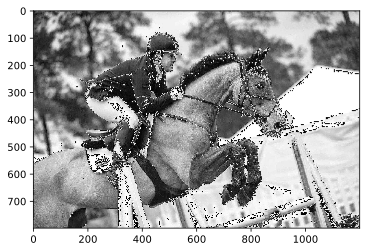

In [4]:
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

img = mpimg.imread('images13/bdavidson-09.jpg')
plt.imshow(img)

blur = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

blured_img = np.empty(img.shape)

for i in range(3):
    blured_img[:, :, i] = convolve2d(img[:,:,0], blur)[:img.shape[0], :img.shape[1]]

plt.imshow(blured_img.astype(np.uint8))

!pip install scikit-image

### Детектирование лиц

### <font color="blue">ЗАДАНИЕ</font>

* Найдите лица на 4 случайных фотограциях из каталога _data13/lfw/_
* Сравните результаты _вывода_ изображений, если пользоваться функциями cv2.imread и skimage.io.imread
* Объясните, что произошло
* Определите коодинаты рамок вокруг лиц с помощью  _cv2.CascadeClassifier_
* Отрисуйте рамки вокруг лиц с помощью _cv2.rectangle_
* Выведите полученные изображения в виде матрицы 4 х 4
<br><br>
- Файлы для настройки классификатора загрузите из https://github.com/opencv/opencv/tree/master/data/haarcascades


In [5]:
# CentOS
#sudo yum install libXext libSM libXrender

# Ubuntu 
# apt-get install -y libsm6 libxext6 libxrender-dev

#!pip install opencv-python

In [6]:
import skimage.io
import cv2

# часть кода уже есть

imagePath = "data13/lfw/James_Hoffa/James_Hoffa_0001.jpg"
cascPath = "CascadeClassifier.xml"

# Извлеките 4 произвольных лица из каталога data13/lfw/
image = cv2.imread(imagePath)

# Детектор на основе каскадов Хаара
detector = cv2.CascadeClassifier(cascPath)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Определим координаты лиц
faces = detector.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30),
    flags = cv2.CASCADE_SCALE_IMAGE
)

# Рисуем прямоугольник вокруг лиц
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
# Выведите результат в виде матрицы изображений 2 х 2


## Сверточные нейросети

* Классификация
* Детекция
* Сегментация

<img src="images13/fpls-08-02235-g003.jpg">

Из чего состоит
* сверточные слои - извлекают _шаблоны_
* слои субдискретизации (poolinhg layer)
* полносвязные слои (1-2) на выходе модели

<img src="images13/MaxpoolSample2.png">

### Пример нейросети 

### AlexNet (2012)

<img src="images13/vgg-01.jpeg">

### VGG (2014)

<img src="images13/vgg-02.png">

<img src="images13/vgg-16.png">

### ResNet  (2015)

<img src="images13/resnet-1.png">

<img src="images13/resnet-2.png">

In [7]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import np_utils


ModuleNotFoundError: No module named 'keras'

<img src="images13/keras-workflow.jpg">

## <font color="red">ЗАДАНИЕ</font>

Загрузите данные лиц, целевой вектор - имя каталога

In [ ]:
# Ваш код


#### Препроцессинг:

* Определите координаты лиц
* Преобразуйте все лица в вещественный массив в виде $(N, 128, 128, 3)$, где N - количество изображений

Воспользуйтесь логистической регрессией 

In [ ]:
# Ваш код


Оцените точность (accuracy)

In [ ]:
# Ваш код


Обучите сетку на основе MLP

In [ ]:
# Ваш код

# измените разрешение на нужное
input_shape = (128, 128,3)
input_dim = input_shape[0] * input_shape[1] * input_shape[2]

# количество выходных классов
nb_classes = 10

## Ниже - прототип модели! Переделывайте под себя, бейте его и т.д.
# MLP
model = Sequential()
model.add(Dense(512, input_dim=input_dim))
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

# we'll use categorical xent for the loss, and RMSprop as the optimizer
model.compile(loss='categorical_crossentropy', optimizer='rmsprop')
model.summary()

In [ ]:
print("Training...")
model.fit(X_train, y_train, nb_epoch=10, batch_size=16, validation_split=0.1, show_accuracy=True, verbose=2)

print("Generating test predictions...")
preds = model.predict_classes(X_test, verbose=0)

def write_preds(preds, fname):
    pd.DataFrame({"ImageId": list(range(1,len(preds)+1)), "Label": preds}).to_csv(fname, index=False, header=True)

write_preds(preds, "keras-mlp.csv")

Оцените точность (accuracy)

In [ ]:
# Ваш код


Обучите сетку на основе VGG

In [ ]:
# Ваш код

## Ниже - прототип модели! Переделывайте под себя, бейте его и т.д.

input_shape = (128, 128,3)

model = Sequential()
# input: 100x100 images with 3 channels -> (3, 100, 100) tensors.
# this applies 32 convolution filters of size 3x3 each.

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(10))
model.add(Activation('softmax'))

#sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(loss='categorical_crossentropy', optimizer=sgd)

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.summary()

Оцените точность (accuracy)

In [ ]:
# Ваш код

# Измените для себя!
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

## Нейронные сети

В качестве домашнего задания:
* попробуйте реализовать то же самое с CFAR10

In [ ]:
# Ваш код


https://github.com/Prakashvanapalli/TensorFlow/blob/master/Blogposts/Backpropogation_with_Images.ipynb

## Экзаменационные вопросы:

* Проблемы MLP
* Свертка и ядра свертки
* Сверточные сети
* Стандартный алогритм обучения на основе сверточной сети по изображениям